In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

TensorFlow 1.x selected.


In [2]:
batch_size = 10
hidden_layer = 256
clip_margin = 5
learning_rate = 0.001
epochs = 100
window_size = 21

In [3]:
# tesla_stocks = pd.read_csv('data/tesla_stocks.csv')
# data_to_use = tesla_stocks['Close'].values
# data_to_use = np.array( 
#         [ [12.026999950408936, 12.056999969482423, 12.032999897003174, 12.078999900817871, 12.026999950408936, 12.048999977111816, 12.094999980926513, 12.114999961853027, 12.124999809265137, 12.112999820709229, 12.112999820709229, 12.07200002670288, 12.065999984741211, 12.082999801635742, 12.087999820709229, 12.043999862670898, 11.958999824523925, 11.906999969482422, 11.851999950408935, 11.742000007629395], 
#          [637700.0, 1085980.0, 2112100.0, 912100.0, 504020.0, 513330.0, 736580.0, 727010.0, 522460.0, 687640.0, 503740.0, 663580.0, 724090.0, 627790.0, 427160.0, 861370.0, 643150.0, 878430.0, 645010.0, 490420.0], 
#          [0.05688159388842052, 0.05882849218818863, 0.05901577789949741, 0.05939643891894318, 0.05865408917640583, 0.059908685046691286, 0.059391017326448234, 0.060289802880126704, 0.05965406471734902, 0.057705764103142466, 0.05770463369908128, 0.05733069148563137, 0.058211220451323514, 0.05824511777475008, 0.05824359439961136, 0.05786847503011251, 0.059255619337068445, 0.06349022894163985, 0.06418026336061103, 0.0590955831150588]]
#         )
data_to_use = np.array( [
    [77.1500015258789,77.25,76.8499984741211,76.9000015258789,77.69999694824219,78.55000305175781,79.44999694824219,79.55000305175781,79.75,79.69999694824219,81.4000015258789,81.30000305175781,80.55000305175781,80.6500015258789,80.4000015258789,80.44999694824219,80.0,80.75,80.4000015258789,79.94999694824219,80.3499984741211,81.55000305175781,81.55000305175781,82.19999694824219,82.05000305175781,82.19999694824219,82.4000015258789,82.69999694824219,82.6500015258789,82.0999984741211,82.30000305175781,82.44999694824219,82.1500015258789,83.0,82.0999984741211,81.3499984741211,81.80000305175781,82.5,82.19999694824219,82.3499984741211,82.94999694824219,82.9000015258789,82.1500015258789,81.5999984741211,81.25,80.75,81.30000305175781,81.0,81.6500015258789,81.1500015258789,81.05000305175781,81.8499984741211,81.75,82.55000305175781,82.69999694824219,82.55000305175781,82.30000305175781,82.69999694824219,82.94999694824219,83.0,82.8499984741211,82.94999694824219,82.5999984741211,82.25,82.69999694824219,82.55000305175781,82.8499984741211,82.30000305175781,82.3499984741211,82.3499984741211,83.1500015258789,82.75,82.19999694824219,82.69999694824219,81.5999984741211,80.94999694824219,80.30000305175781,80.69999694824219,80.4000015258789,80.6500015258789,81.5,81.5,81.5,81.8499984741211,82.0999984741211,82.0999984741211,82.0999984741211,83.4000015258789,84.19999694824219,84.05000305175781,84.5,84.30000305175781,84.5999984741211,84.9000015258789,84.55000305175781,84.5,84.4000015258789,84.3499984741211,84.25,84.30000305175781,84.94999694824219,85.19999694824219,85.0999984741211,84.80000305175781,84.69999694824219,84.8499984741211,85.30000305175781,84.94999694824219,84.4000015258789,84.55000305175781,84.30000305175781,84.1500015258789,83.30000305175781,83.5999984741211,84.3499984741211,84.0,84.75,85.1500015258789,85.19999694824219,85.1500015258789,84.1500015258789,83.5999984741211,83.69999694824219,82.25,82.5999984741211,82.9000015258789,82.25,80.8499984741211,80.9000015258789,80.9000015258789,81.5,80.94999694824219,81.0,81.75,81.0999984741211,81.19999694824219,80.80000305175781,81.05000305175781,81.0,81.30000305175781,81.44999694824219,80.6500015258789,80.9000015258789,81.69999694824219,82.1500015258789,82.5999984741211,83.3499984741211,83.5,83.75,84.0999984741211,84.1500015258789,83.75,83.4000015258789,84.0999984741211,84.6500015258789,85.0,85.1500015258789,86.30000305175781,87.1500015258789,87.94999694824219,88.30000305175781,87.19999694824219,87.44999694824219,87.5,85.55000305175781,84.55000305175781,84.6500015258789,85.25,84.9000015258789,83.5999984741211,79.6500015258789,80.6500015258789,80.5999984741211,79.05000305175781,79.69999694824219,79.69999694824219,79.69999694824219,79.69999694824219,79.69999694824219,79.69999694824219,81.5,81.0,82.0,82.4000015258789,82.3499984741211,82.3499984741211,81.75,81.1500015258789,80.75,82.1500015258789,81.80000305175781,82.75,82.8499984741211,84.1500015258789,84.94999694824219,84.30000305175781,84.25,83.9000015258789,83.8499984741211,83.80000305175781,83.8499984741211,83.55000305175781,82.0999984741211,82.19999694824219,83.4000015258789,82.25,82.0999984741211,82.8499984741211,82.25,81.5,81.5,81.5,81.5,82.19999694824219,82.5,82.8499984741211,82.5,82.5,82.30000305175781,81.4000015258789,81.5999984741211,82.6500015258789,80.75,79.94999694824219,79.55000305175781,79.30000305175781,79.05000305175781,79.19999694824219,80.0,80.0,79.4000015258789,78.55000305175781,78.94999694824219,79.5,80.0,80.44999694824219,80.6500015258789,81.5999984741211,82.5,81.6500015258789,81.75,81.19999694824219,80.94999694824219,82.05000305175781,81.75,81.3499984741211,81.55000305175781,81.8499984741211,82.19999694824219,81.8499984741211,80.4000015258789,80.75],
    [5000.0,7400.0,5100.0,16400.0,13700.0,12400.0,39300.0,31400.0,66300.0,37700.0,49800.0,42200.0,13000.0,41600.0,43900.0,13300.0,13300.0,16300.0,12800.0,70300.0,16800.0,17400.0,15500.0,20100.0,18900.0,10200.0,20000.0,7000.0,13100.0,9100.0,11900.0,12600.0,15900.0,11600.0,10200.0,14600.0,11200.0,11700.0,17200.0,42600.0,22900.0,11600.0,9500.0,7600.0,8900.0,11800.0,7700.0,17800.0,37400.0,6800.0,3200.0,9800.0,10500.0,4600.0,12700.0,41200.0,24100.0,38300.0,70500.0,87500.0,87500.0,53600.0,24400.0,23400.0,11100.0,17400.0,29100.0,35400.0,18100.0,17800.0,39100.0,30800.0,27800.0,17100.0,13700.0,21500.0,13500.0,29800.0,30300.0,42100.0,35600.0,37500.0,37500.0,19900.0,29100.0,43200.0,47700.0,34300.0,36000.0,30900.0,27100.0,56900.0,35800.0,45800.0,25300.0,26100.0,48100.0,52100.0,74500.0,126400.0,109600.0,62500.0,42700.0,35600.0,26000.0,38800.0,42700.0,91400.0,115800.0,12800.0,28200.0,73500.0,42100.0,26300.0,33500.0,37500.0,70600.0,74200.0,74200.0,39900.0,38300.0,26300.0,34400.0,29900.0,37200.0,44300.0,18900.0,26800.0,27900.0,49000.0,58000.0,48300.0,38500.0,29100.0,58600.0,52100.0,41200.0,39000.0,28100.0,21100.0,21100.0,17800.0,25200.0,25000.0,70700.0,82200.0,65500.0,30100.0,123100.0,75100.0,52800.0,31500.0,51100.0,95100.0,95100.0,94200.0,78700.0,49300.0,77900.0,235000.0,246000.0,170300.0,167400.0,132300.0,242600.0,148700.0,255600.0,57200.0,118700.0,105000.0,131900.0,123800.0,85400.0,98800.0,89500.0,53200.0,109400.0,83100.0,87800.0,44000.0,107500.0,84100.0,85600.0,135700.0,130900.0,68800.0,111400.0,119500.0,60400.0,82400.0,135700.0,177600.0,223000.0,258500.0,167000.0,104900.0,101600.0,85800.0,121700.0,71700.0,92100.0,74300.0,82500.0,78100.0,133500.0,112700.0,88500.0,88500.0,133700.0,33800.0,52400.0,47600.0,62400.0,44600.0,62300.0,49900.0,61800.0,44800.0,29500.0,70000.0,244500.0,220000.0,45200.0,286600.0,218600.0,57400.0,64600.0,167300.0,39500.0,27600.0,16700.0,192400.0,31900.0,70300.0,25100.0,132300.0,107400.0,112600.0,68500.0,91700.0,126400.0,72400.0,67400.0,46100.0,336800.0,148600.0,71500.0,49800.0,49800.0,110000.0,68800.0,78200.0],
    [0.06441732474664304,0.07592680410944491,0.07520767262303545,0.0772849592723677,0.07729428748803809,0.08369054363897388,0.08722961032869522,0.09276626686816761,0.0928071265071059,0.0926012564602298,0.09259145590207653,0.1106313843430622,0.11085572394564648,0.11769914606172255,0.11427428910612249,0.11537181863597647,0.11529827394502026,0.11402299332807367,0.11702909345010301,0.11868714714155165,0.12071002214205764,0.12044662040528292,0.12020544221494439,0.12045896966091453,0.1184561905042781,0.1193893668003695,0.11661237579467283,0.11292329592734536,0.10836314903195668,0.10867996271290659,0.11235577161547555,0.11217493850301613,0.08816218541195102,0.08913998117102669,0.0879520164039672,0.09733985025653391,0.10233584082837836,0.10370034328981194,0.10423369271510308,0.10168148695256563,0.1000271279244772,0.0990584091589674,0.09866941353381395,0.09282653224447623,0.09585809212309515,0.09261304726780174,0.09447676636429687,0.09754621292506971,0.09751848863908744,0.10095778688084285,0.10267648484934454,0.10061191544190992,0.10623969048272705,0.10602195997771259,0.1106675462229492,0.10498241533614036,0.09810641952898036,0.09308415796818166,0.09268321909353841,0.08876783037093448,0.08768198840156645,0.08786451577026204,0.08441659090659978,0.08560859982105946,0.08099826500710484,0.0792138137067806,0.07778904348723653,0.07429077110679555,0.07609067878541444,0.07456198616126887,0.07005266602146401,0.07265753045271323,0.07504948255015137,0.07241716885263869,0.0748448149242451,0.08133288392479508,0.08460611619768753,0.08788407029002453,0.0901422436203747,0.08817959912774394,0.08823123710622925,0.09675315159515806,0.0967354143580137,0.09652357283146974,0.0972254340248625,0.09692090893396789,0.09491064517930749,0.09477187427306544,0.10852479993119914,0.10984652804892489,0.11026815769347886,0.11117653073893162,0.10760005579020371,0.10620083977316311,0.1028484693906359,0.10323979799694051,0.08996576116417829,0.08393248580735932,0.07668621465981629,0.07697963243006606,0.07443491879743529,0.07663646207506389,0.07122609805869977,0.07175310597373928,0.07392890946986809,0.07411264214363451,0.07394450133431492,0.07475546343579058,0.07720922974720003,0.06395329154271966,0.055727607427339454,0.05636874416368321,0.05355887125114047,0.06298003280360535,0.0630136099937857,0.06952854806318273,0.06954640857116459,0.07615783392748232,0.07752104000334196,0.07743842503486496,0.07731032711956953,0.08780700714926098,0.08586784597735331,0.08516550335010156,0.10207151435887427,0.10369922456743752,0.10500337417486469,0.10696684464202635,0.11643034766066587,0.11676723656792452,0.1160466209769425,0.11974092783771492,0.12089087543421977,0.12119811601761152,0.12288878235320246,0.12404095945049956,0.11893761367538958,0.11915131213203209,0.11439729204977611,0.11197025633795105,0.11344279894912945,0.11416070029015798,0.11235466870157215,0.11241849458328182,0.11859319917885512,0.10533309888666333,0.10600775217600236,0.10974333731414307,0.10595082458789104,0.08494916695082916,0.08526551257970143,0.08513456025486223,0.08560265928782443,0.08308928900266506,0.08625287939130852,0.08391513438673938,0.07690991322396731,0.07684763693481275,0.08114028767942251,0.08420864073953542,0.0850008072878087,0.08499722999614645,0.10153161679068555,0.09029155324339365,0.09094692101227798,0.12453011596145941,0.13244790881615248,0.13164922137982124,0.1303949796075627,0.13152746512677962,0.14214646919122134,0.21545833573198928,0.22123217089039732,0.22105940477049696,0.22887043025370293,0.2287743034319295,0.22672266868104612,0.2256213659089477,0.2252469462874198,0.21785229637110312,0.21298075053472934,0.22713960056753596,0.22564921042194036,0.2300720712572095,0.23077574361995715,0.23060144709480668,0.21989501851915402,0.2179883299201872,0.2185922070842535,0.2163683778233405,0.2263153753065462,0.22119895288328437,0.14783153280086098,0.14290837566156595,0.15059640116084516,0.13164218867990926,0.13562647547163584,0.13578149221587346,0.13747294648631056,0.13761490886749048,0.1377553194721631,0.13764592446829693,0.1193097796434351,0.13306812734648638,0.12656549747776638,0.13481651424991445,0.1434115599053037,0.14353543589137094,0.14441701970530818,0.1443521103267933,0.14699056273554637,0.13443774237926762,0.13372770840203227,0.1271160964413127,0.1308267060205698,0.11906909743238131,0.11482264528474366,0.11306271225596325,0.11310785529562581,0.11267669188244955,0.11769464220849088,0.11839799159218925,0.12751932260476448,0.14850041980954895,0.14080299107816685,0.1410615123618069,0.12906653721341457,0.12254215117603083,0.12320941689280163,0.12425427369905002,0.1227426900279964,0.1216105600509703,0.12566595975883327,0.127674569002761,0.1307815574799334,0.12895746584667586,0.13002721326042085,0.12928227641420295,0.135976412106799,0.14142906236836306,0.1455425474400031,0.1406240156263148,0.14228991157927348,0.13478069582770313,0.11816265318145071,0.11312084107993998,0.11305014355516624,0.11212751414401119,0.11121918395508047,0.11156847731469013,0.1092936574079869,0.1267412560729183]
      ] )
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_use[0].reshape(-1, 1))
scaled_volume = scaler.fit_transform(data_to_use[1].reshape(-1, 1))
scaled_volat = scaler.fit_transform(data_to_use[2].reshape(-1, 1))
print(len(scaled_data),len(scaled_volume),len(scaled_volat))

252 252 252


In [4]:
def window_data(data,data2,data3, window_size):
    X_tmp = []
    y = []
    i = 0
    while (i + window_size) < len(data):
        X_tmp.append( [ data[ i: i+window_size ], data2[ i: i+window_size ], data3[ i: i+window_size ]])
        y.append(data[ i+window_size ])     
        i += 1
    assert len(X_tmp) ==  len(y)
    X = []
    for i in range(len(X_tmp)):
      raw0 = X_tmp[i][0]
      raw1 = X_tmp[i][1]
      raw2 = X_tmp[i][2]
      raw = []
      for j in range(len(X_tmp[i][0])):
        raw.append( [ raw0[j], raw1[j], raw2[j] ] )
      X.append(raw)
    return X, y
    # return X_tmp, y


X, y = window_data(scaled_data, scaled_volume, scaled_volat, window_size)
print(len(X),len(y))

231 231


In [5]:
print(len(X[0]))

21


In [7]:
X_train = np.array(X[:200])
y_train = np.array(y[:200])
X_test = np.array(X[200:])
y_test = np.array(y[200:])
# print("X",X)
# print("y",y)
# print("X_train",X_train)
# print("y_train",y_train)
# print("X_test",X_test)
# print("y_test",y_test)
print(len(X_train),len(X_test))
# print("X_train[0]",X_train[0])
print("y_train[0]",y_train[0])

200 31
y_train[0] [-0.36065901]


In [8]:
inputs = tf.placeholder(tf.float32, [batch_size, window_size, len(X_train[0][0]) ])
targets = tf.placeholder(tf.float32, [batch_size, 1 ])
# print(inputs[0])
print(inputs)
print(targets)

Tensor("Placeholder:0", shape=(10, 21, 3), dtype=float32)
Tensor("Placeholder_1:0", shape=(10, 1), dtype=float32)


In [9]:
#Weights for the input gate
weights_input_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev = 0.05))
weights_input_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev = 0.05))
# bias_input = tf.Variable(tf.truncated_normal(len(X_train[0][0]),tf.zeros([hidden_layer])))
bias_input = tf.Variable(tf.zeros([hidden_layer]))
print(weights_input_gate,weights_input_hidden,bias_input)

#weights for the forgot gate
weights_forget_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev = 0.05))
weights_forget_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev = 0.05))
# bias_forget = tf.Variable(tf.truncated_normal(len(X_train[0][0]),tf.zeros([hidden_layer])))
bias_forget = tf.Variable(tf.zeros([hidden_layer]))
print(weights_forget_gate,weights_forget_hidden,bias_forget)

#weights for the output gate
weights_output_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev = 0.05))
weights_output_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev = 0.05))
# bias_output = tf.Variable(tf.truncated_normal(len(X_train[0][0]),tf.zeros([hidden_layer])))
bias_output = tf.Variable(tf.zeros([hidden_layer]))
print(weights_output_gate,weights_output_hidden,bias_output)

#weights for the memory cell
weights_memory_cell = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev = 0.05))
weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev = 0.05))
# bias_memory_cell = tf.Variable(tf.truncated_normal(len(X_train[0][0]),tf.zeros([hidden_layer])))
bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))
print(weights_memory_cell,weights_memory_cell_hidden,bias_memory_cell)

## Output layer weigts
weights_output = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev = 0.05))
bias_output_layer = tf.Variable(tf.zeros(1))
print(weights_output,bias_output_layer)

## Output reshape layer weights
weights_reshape_output = tf.Variable(tf.truncated_normal([1 ,len(X_train[0][0])], stddev = 0.05))
bias_reshape_output = tf.Variable(tf.zeros(1))
print(weights_reshape_output,bias_reshape_output)

<tf.Variable 'Variable:0' shape=(1, 256) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref> <tf.Variable 'Variable_2:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1, 256) dtype=float32_ref> <tf.Variable 'Variable_4:0' shape=(256, 256) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_6:0' shape=(1, 256) dtype=float32_ref> <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref> <tf.Variable 'Variable_8:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(1, 256) dtype=float32_ref> <tf.Variable 'Variable_10:0' shape=(256, 256) dtype=float32_ref> <tf.Variable 'Variable_11:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_12:0' shape=(256, 1) dtype=float32_ref> <tf.Variable 'Variable_13:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_14:0' shape=(1, 3) dtype=float32_ref> <tf.Variable 'Variable_15:0' shape=(1,) dtype=float32_ref>


In [10]:
def LSTM_cell(input, state, output):
    # input = tf.transpose(input)
    # print(tf.transpose(input))
    # print(input)
    # print(weights_input_gate)
    # print(tf.matmul( input, weights_input_gate))
    # print(tf.matmul(output, weights_input_hidden))
    # print(bias_input)
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    
    state = state * forget_gate + input_gate * memory_cell
    
    output = output_gate * tf.tanh(state)
    return state, output

In [11]:
def LSTM_a_batch( iii, batch_state, batch_output, outputs ):
    for j in range(window_size):
        batch_state, batch_output = LSTM_cell(tf.reshape(iii[j], (-1, 1)), batch_state, batch_output)
    tmp = tf.matmul(batch_output, weights_output) + bias_output_layer
    outputs.append(tf.matmul(weights_reshape_output, tmp) + bias_reshape_output)
    return outputs

In [12]:
outputs = []
for i in range(batch_size):
    batch_state = np.zeros([len(X_train[0][0]), hidden_layer], dtype = np.float32) 
    batch_output = np.zeros([len(X_train[0][0]), hidden_layer], dtype = np.float32)
    outputs = LSTM_a_batch( inputs[i], batch_state, batch_output, outputs)
    # for j in range(window_size):
    #     batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][j], (-1, 1)), batch_state, batch_output)
    # outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)
    # tf.matmul(batch_output, weights_output) + bias_output_layer
outputs[0]

<tf.Tensor 'add_190:0' shape=(1, 1) dtype=float32>

In [13]:
outputs

[<tf.Tensor 'add_190:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_381:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_572:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_763:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_954:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1145:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1336:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1527:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1718:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1909:0' shape=(1, 1) dtype=float32>]

In [14]:
losses = []

for i in range(len(outputs)):
    # print(tf.reshape(targets[i], (-1, 1)))
    # print(outputs[i])
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
    
loss = tf.reduce_mean(losses)
loss

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [15]:
targets

<tf.Tensor 'Placeholder_1:0' shape=(10, 1) dtype=float32>

In [16]:
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.train.AdamOptimizer(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

In [17]:
session = tf.Session()

In [18]:
session.run(tf.global_variables_initializer())

In [19]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch_tmp = X_train[ii:ii+batch_size]
        X_batch = X_batch_tmp.reshape(inputs.shape)
        y_batch = y_train[ii:ii+batch_size]
        # print(outputs)
        # print(loss)
        # print(trained_optimizer)
        # print(X_batch)
        # print(y_batch)
        
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 20) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/100  Current loss: 0.8188028335571289
Epoch 20/100  Current loss: 0.18407703936100006
Epoch 40/100  Current loss: 0.08605106920003891
Epoch 60/100  Current loss: 0.08507121354341507
Epoch 80/100  Current loss: 0.05732635408639908


In [20]:
print(inputs.shape)
print(X_batch.shape)
print(targets.shape)
print(y_batch.shape)

(10, 21, 3)
(10, 21, 3)
(10, 1)
(10, 1)


In [21]:
sup =[]
# for i in range(batch_size):
#   sup.append(None)
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])
len(sup)

200

In [22]:
# test
tests = []
i = 0
while i+batch_size <= len(X_test):
    X_test_tmp = X_test[i:i+batch_size]
    o = session.run([outputs], feed_dict={inputs:X_test_tmp.reshape(inputs.shape)})
    i += batch_size
    tests.append(o)
tests

[[[array([[-0.34681872]], dtype=float32),
   array([[0.2330298]], dtype=float32),
   array([[-0.23730846]], dtype=float32),
   array([[-0.5276116]], dtype=float32),
   array([[-0.615448]], dtype=float32),
   array([[-0.91123277]], dtype=float32),
   array([[-1.0334991]], dtype=float32),
   array([[-0.8728944]], dtype=float32),
   array([[-0.37191045]], dtype=float32),
   array([[-0.50041765]], dtype=float32)]],
 [[array([[-0.62588286]], dtype=float32),
   array([[-0.61903954]], dtype=float32),
   array([[-0.8097067]], dtype=float32),
   array([[-0.69741786]], dtype=float32),
   array([[-0.65955573]], dtype=float32),
   array([[-0.43710116]], dtype=float32),
   array([[-0.07703906]], dtype=float32),
   array([[0.16894564]], dtype=float32),
   array([[0.23594332]], dtype=float32),
   array([[-0.03543608]], dtype=float32)]],
 [[array([[-0.2884368]], dtype=float32),
   array([[-0.4415172]], dtype=float32),
   array([[-0.38345823]], dtype=float32),
   array([[-0.18932508]], dtype=float32),


In [23]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])
tests_new

[array([[-0.34681872]], dtype=float32),
 array([[0.2330298]], dtype=float32),
 array([[-0.23730846]], dtype=float32),
 array([[-0.5276116]], dtype=float32),
 array([[-0.615448]], dtype=float32),
 array([[-0.91123277]], dtype=float32),
 array([[-1.0334991]], dtype=float32),
 array([[-0.8728944]], dtype=float32),
 array([[-0.37191045]], dtype=float32),
 array([[-0.50041765]], dtype=float32),
 array([[-0.62588286]], dtype=float32),
 array([[-0.61903954]], dtype=float32),
 array([[-0.8097067]], dtype=float32),
 array([[-0.69741786]], dtype=float32),
 array([[-0.65955573]], dtype=float32),
 array([[-0.43710116]], dtype=float32),
 array([[-0.07703906]], dtype=float32),
 array([[0.16894564]], dtype=float32),
 array([[0.23594332]], dtype=float32),
 array([[-0.03543608]], dtype=float32),
 array([[-0.2884368]], dtype=float32),
 array([[-0.4415172]], dtype=float32),
 array([[-0.38345823]], dtype=float32),
 array([[-0.18932508]], dtype=float32),
 array([[0.4800781]], dtype=float32),
 array([[0.674

In [24]:
test_results = []
t = len(sup)-1
count = 0
for i in range(len(X)):
    # print(i)
    if i > t:
      if count == len(tests_new):
        break
      else:
        test_results.append(tests_new[count])
        count+=1
    else:
        test_results.append(None)
test_results

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


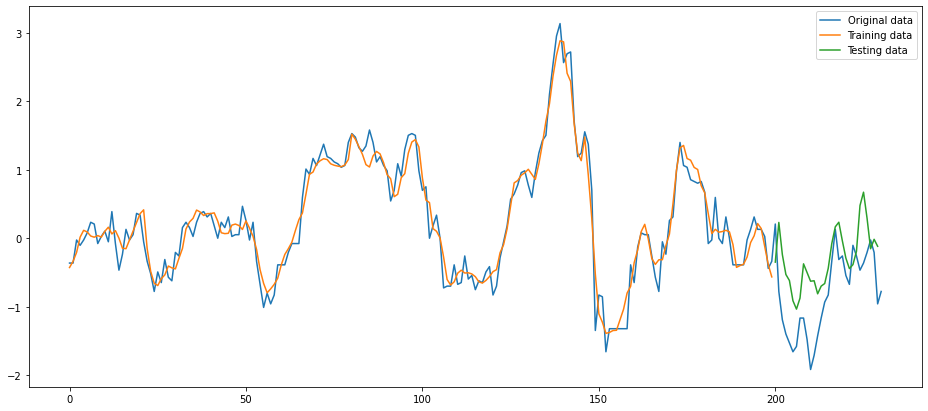

In [25]:
plt.figure(figsize=(16, 7))
plt.plot(y, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

In [26]:
print(len(y),len(sup),len(test_results))

231 200 230


In [27]:
X_test_tmp.shape

(10, 21, 3, 1)

In [30]:
data_a_month = np.array(
    [
     [81.3499984741211, 82.5999984741211, 82.5, 83.30000305175781, 83.44999694824219, 82.55000305175781, 82.6500015258789, 82.5, 83.0, 81.75, 81.94999694824219, 81.94999694824219, 80.5999984741211, 81.5, 81.25, 81.1500015258789, 80.9000015258789, 80.69999694824219, 80.4000015258789, 80.05000305175781, 81.44999694824219],
     [102400.0, 120700.0, 138000.0, 126300.0, 72400.0, 68600.0, 110700.0, 89500.0, 83700.0, 163200.0, 64700.0, 113300.0, 53800.0, 135800.0, 167600.0, 96400.0, 151700.0, 132000.0, 149200.0, 65600.0, 54000.0],
     [0.11746395710891079, 0.11912344199547836, 0.127298691892572, 0.12659927136235996, 0.12854404661582505, 0.12787718082248525, 0.13470584969830549, 0.1293602252558059, 0.12419032853411432, 0.12008584478857405, 0.13160393287345312, 0.12959973188200063, 0.12901223172892728, 0.13294167419811648, 0.13845024378667828, 0.13783148796494069, 0.13758782819292179, 0.13718159604907482, 0.1362273733863873, 0.1360776012977379, 0.12281450118727147]
    #  [82.5999984741211, 82.5, 83.30000305175781, 83.44999694824219, 82.55000305175781, 82.6500015258789, 82.5, 83.0, 81.75, 81.94999694824219, 81.94999694824219, 80.5999984741211, 81.5, 81.25, 81.1500015258789, 80.9000015258789, 80.69999694824219, 80.4000015258789, 80.05000305175781, 81.44999694824219],
    #  [120700.0, 138000.0, 126300.0, 72400.0, 68600.0, 110700.0, 89500.0, 83700.0, 163200.0, 64700.0, 113300.0, 53800.0, 135800.0, 167600.0, 96400.0, 151700.0, 132000.0, 149200.0, 65600.0, 54000.0],
    #  [0.11912344199547836, 0.127298691892572, 0.12659927136235996, 0.12854404661582505, 0.12787718082248525, 0.13470584969830549, 0.1293602252558059, 0.12419032853411432, 0.12008584478857405, 0.13160393287345312, 0.12959973188200063, 0.12901223172892728, 0.13294167419811648, 0.13845024378667828, 0.13783148796494069, 0.13758782819292179, 0.13718159604907482, 0.1362273733863873, 0.1360776012977379, 0.12281450118727147] 
    ]
)
scaled_close_1m = scaler.fit_transform(data_a_month[0].reshape(-1, 1))
scaled_volume_1m = scaler.fit_transform(data_a_month[1].reshape(-1, 1))
scaled_vola_1m = scaler.fit_transform(data_a_month[2].reshape(-1, 1))

X_tmp = [scaled_close_1m,scaled_volume_1m,scaled_vola_1m]
X_1m = []
for i in range(len(scaled_close_1m)):
  raw0 = X_tmp[0][i]
  raw1 = X_tmp[1][i]
  raw2 = X_tmp[2][i]
  raw = [ raw0[0], raw1[0], raw2[0]]
  # for j in range(len(X_tmp[0][i])):
  #   raw.append( [ raw0[j], raw1[j], raw2[j] ] )
  X_1m.append(raw)
X_1m = np.array(X_1m)
print("X_1m",X_1m.shape)
# print(X_1m)
# X_1m, y_1m = window_data(scaled_close_1m, scaled_volume_1m, scaled_vola_1m, window_size)

X_1m (21, 3)


In [31]:
X_1m_run = []
for i in range(batch_size):
  X_1m_run.append(X_1m)
X_1m_run = np.array(X_1m_run)  
X_1m_run = X_1m_run.reshape(X_test_tmp.shape)

In [32]:
X_1m_run.shape

(10, 21, 3, 1)

In [33]:
o = session.run([outputs], feed_dict={inputs:X_1m_run.reshape(inputs.shape)})
# o

In [34]:
predict_y = o[0][0]
print("predict_y:",predict_y )

predict_y: [[-0.93667716]]


In [35]:
# x + 2y = 3
# 4x ＋ 5y = 6
# A = np.mat('1,2; 4,5')    # 构造系数矩阵 A
# b = np.mat('3,6').T       # 构造转置矩阵 b （这里必须为列向量）
# r = np.linalg.solve(A,b)  # 调用 solve 函数求解
# print(r)

# 原*x + y = 後 
# 原 = (後-y)/x
# data_a_month[0][0] * x + y = scaled_close_1m[0]
# data_a_month[0][1] * x + y = scaled_close_1m[1]
A = np.matrix([[data_a_month[0][0],1],[data_a_month[0][1],1]])   
b = np.matrix( [ [scaled_close_1m[0][0],scaled_close_1m[1][0]] ] ).T      
r = np.linalg.solve(A,b)  # 调用 solve 函数求解
print(r)

[[  1.0517435 ]
 [-86.02009761]]


In [36]:
predict_close = (predict_y-r[1,0])/r[0,0]
print("predict_close:",predict_close[0,0])

predict_close: 80.8975
